In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [116]:
df_train = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_test.csv")


In [117]:
df_train.sample(10)


,YearsExperience,Salary
17,7.1,98273.0
3,2.2,39891.0
20,9.0,105582.0
10,4.0,56957.0
4,2.9,56642.0
0,1.1,39343.0
7,3.7,57189.0
5,3.2,54445.0
9,4.0,55794.0
11,4.1,57081.0


<Axes: xlabel='YearsExperience'>

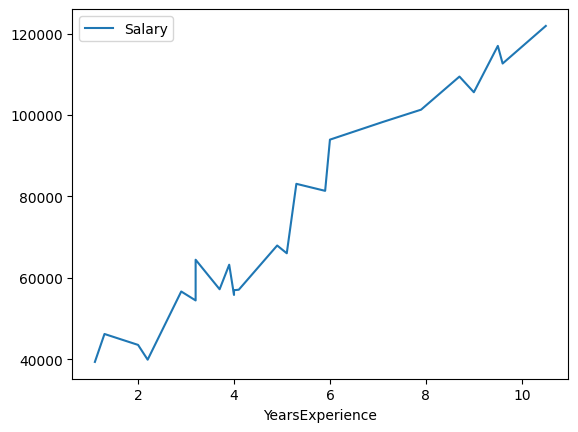

In [118]:
df_train.plot("YearsExperience", "Salary")

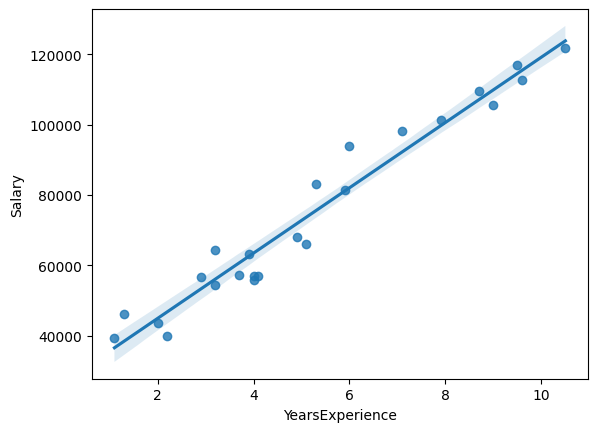

In [119]:
#fig,axis = plt.subplots(1,1)
sns.regplot(data= df_train, x = "YearsExperience", y="Salary")
plt.show()

In [120]:
df_train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.977132
Salary,0.977132,1.000000


In [121]:
X_train = df_train[["YearsExperience"]]

y_train = df_train["Salary"]

X_test = df_test[["YearsExperience"]]

y_test = df_test["Salary"]

In [122]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [123]:
print(f"Bo: {model.intercept_}")
print(f"B1: {model.coef_}")

Bo: 26354.43069701219
B1: [9277.78307971]


In [124]:
y_hat = model.predict(X_test)
y_hat

array([ 40271.10531658,  54187.77993614,  68104.45455571,  89443.35563904,
       102432.25195063, 121915.59641802])

In [125]:
print(f"mean squared error (MSE): {mean_squared_error(y_test, y_hat)}")

mean squared error (MSE): 37649779.451336615


In [126]:
print(f"r squared (r2): {r2_score(y_test, y_hat)}")

r squared (r2): 0.959714925174946


In [127]:
def equation(x):
    return 26354.43069 + 9277.78*x

[]

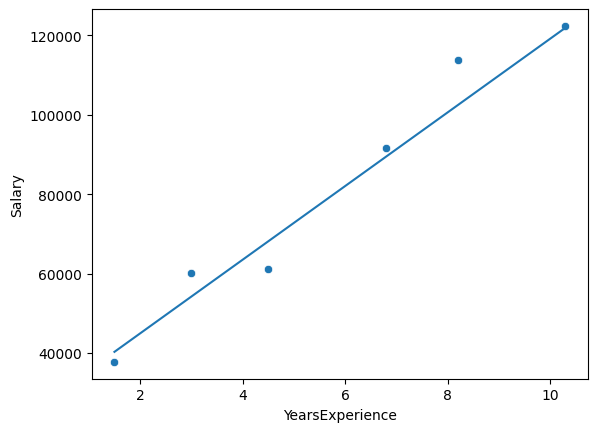

In [128]:
sns.scatterplot(data=df_test, x="YearsExperience", y= "Salary")
sns.lineplot(x=df_test.YearsExperience, y=equation(df_test.YearsExperience))
plt.plot()

In [129]:
df_multi_train = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_train.csv")
df_multi_test = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_test.csv")

In [130]:
df_multi_train.sample(10)

,Gender,Height,Weight
4732,-1.0,-1.500450,118.758042
3685,-1.0,-1.022527,124.286143
1434,1.0,0.851459,195.033701
1977,1.0,1.363679,206.163433
932,-1.0,0.317435,150.380597
5252,-1.0,-0.894667,120.192432
6784,-1.0,0.484230,161.334232
5661,1.0,1.008698,202.921364
2933,-1.0,-0.681529,136.348218
3265,1.0,1.988217,207.710757


In [131]:
df_multi_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,8000.0,0.001750,1.000061,-1.000000,-1.000000,1.000000,1.000000,1.000000
Height,8000.0,0.006488,0.999803,-3.146184,-0.736128,-0.006571,0.735436,3.283099
Weight,8000.0,161.651425,31.980908,64.700127,136.223075,161.549008,187.229144,269.989699


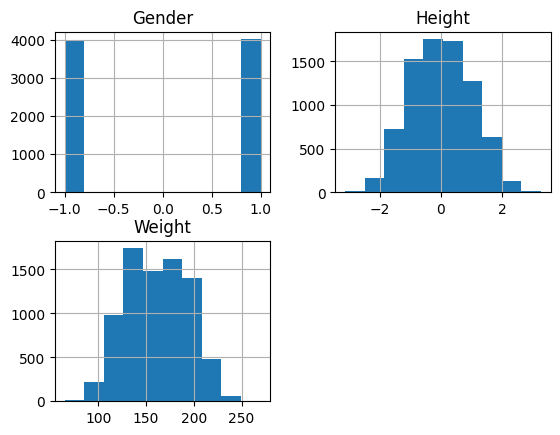

In [132]:
df_multi_train.hist()
plt.show()

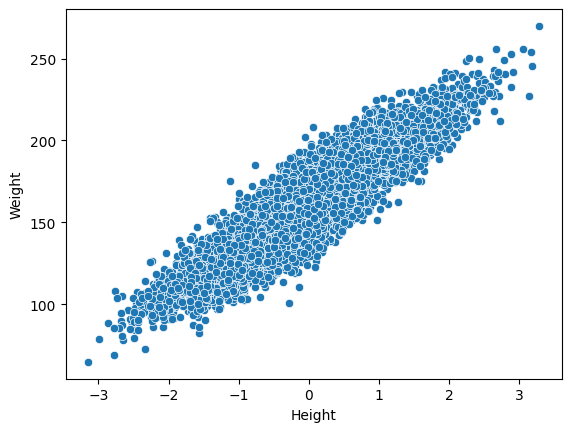

In [133]:
sns.scatterplot(data=df_multi_train, x="Height", y="Weight")
plt.show()

In [134]:
df_multi_train.corr()

,Gender,Height,Weight
Gender,1.000000,0.691515,0.796480
Height,0.691515,1.000000,0.924081
Weight,0.796480,0.924081,1.000000


In [135]:
X_multi_train = df_multi_train[["Gender", "Height"]]
y_multi_train = df_multi_train["Weight"]

X_multi_test = df_multi_test[["Gender", "Height"]]
y_multi_test = df_multi_test["Weight"]

In [136]:
multi_model = LinearRegression()
multi_model.fit(X_multi_train, y_multi_train)

LinearRegression()

In [138]:
print(f"Bo: {multi_model.intercept_}")
print(f"B1 and B2: {multi_model.coef_}")

Bo: 161.48606316160345
B1 and B2: [ 9.65020608 22.88377295]


In [139]:
y_multi_hat = multi_model.predict(X_multi_test)

In [140]:
print(f"mean squared error (MSE): {mean_squared_error(y_multi_hat, y_multi_test)}")
print(f"coefficient of determination (r2): { r2_score(y_multi_hat, y_multi_test)}")

mean squared error (MSE): 98.21235363443171
coefficient of determination (r2): 0.8934895708789713


In [143]:
X_uni_train = df_multi_train[["Gender"]]
y_uni_train = df_multi_train["Weight"]

X_uni_test = df_multi_test[["Gender"]]
y_uni_test = df_multi_test["Weight"]

In [144]:
uni_model = LinearRegression()
uni_model.fit(X_uni_train, y_uni_train)

LinearRegression()

In [145]:
print(f"Bo: {uni_model.intercept_}")
print(f"B1 and B2: {uni_model.coef_}")

Bo: 161.60685108627294
B1 and B2: [25.47061025]


In [146]:
y_uni_hat = uni_model.predict(X_uni_test)

In [147]:
print(f"mean squared error (MSE): {mean_squared_error(y_uni_hat, y_uni_test)}")
print(f"coefficient of determination (r2): { r2_score(y_uni_hat, y_uni_test)}")

mean squared error (MSE): 387.09049605093895
coefficient of determination (r2): 0.40330130384903595


In [ ]:
# 98.2 vs 387.09 | Smaller MSE = better model
# 0.89 vs 0.40 | Greater r2 = better model
# The more variable available in the model yield a better r2, even when the variables are not relevant to the model